## EXERCISE 14.1

### Chile Dataset

In [153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Specify the file path where the Chile dataset is located
file_path = r"C:\Users\acer\Downloads\Chile.txt"

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
chile_data.head()


First Few Rows:


,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N


In [158]:
print(chile_data.info())
data = chile_data

# Drop rows with any missing values
data.dropna(inplace=True)

# Convert categorical variables to dummy variables
data['sex'] = data['sex'].map({'M': 1, 'F': 0})
data = pd.get_dummies(data, columns=['region', 'education'], drop_first=True)

# Print column names to check new dummy variables
print(data.columns)

# Fit logistic regression model using correct dummy variable names
# Update this line with the actual names from data.columns
model = smf.logit("vote.map({'Y': 1, 'N': 0}) ~ region_M + region_N + region_S + region_SA + population + sex + age + education_PS + education_S + income + statusquo", data=data).fit()
print(model.summary())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 1 to 2700
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      2700 non-null   object 
 1   population  2700 non-null   int64  
 2   sex         2700 non-null   object 
 3   age         2699 non-null   float64
 4   education   2689 non-null   object 
 5   income      2602 non-null   float64
 6   statusquo   2683 non-null   float64
 7   vote        1757 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 189.8+ KB
None
Index(['population', 'sex', 'age', 'income', 'statusquo', 'vote', 'region_M',
       'region_N', 'region_S', 'region_SA', 'education_PS', 'education_S'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.206540
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     vote.map({'Y': 1, 'N': 0})   No

In [159]:
from scipy.stats import chi2
significant_model = smf.logit("vote.map({'Y': 1, 'N': 0}) ~ sex + education_PS + education_S + statusquo", data=data).fit()
print(significant_model.summary())
intercept_only_model = smf.logit("vote.map({'Y': 1, 'N': 0}) ~ 1", data=data).fit()
deviance_difference = 2 * (significant_model.llf - intercept_only_model.llf)
p_value = chi2.sf(deviance_difference, df=significant_model.df_model - intercept_only_model.df_model)
print(f"Deviance Difference: {deviance_difference}, p-value: {p_value}")

Optimization terminated successfully.
         Current function value: 0.207938
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     vote.map({'Y': 1, 'N': 0})   No. Observations:                 1703
Model:                                  Logit   Df Residuals:                     1698
Method:                                   MLE   Df Model:                            4
Date:                        Fri, 03 May 2024   Pseudo R-squ.:                  0.6999
Time:                                20:01:11   Log-Likelihood:                -354.12
converged:                               True   LL-Null:                       -1180.1
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0153      0.189      

### This indicates that the selected variables used to explain variations in voting behavior have been highly effective. The low p-values associated with each variable and the overall likelihood ratio test highlight the significant contributions these variables make to the model's success in explaining voting behavior.

### Titanic Dataset

In [154]:
# Specify the file path where the Chile dataset is located
file_path = r"C:\Users\acer\Downloads\Titanic.txt"

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
titanic.head()


First Few Rows:


,,survived,age____passengerClass,sex
"Allen, Miss Elisabeth Walton",yes,29.0000,1st,female
"Allison, Miss Helen Loraine",no,2.0000,1st,female
"Allison, Mr Hudson Joshua Creighton",no,30.0000,1st,male
"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",no,25.0000,1st,female
"Allison, Master Hudson Trevor",yes,0.9167,1st,male


In [23]:
# Display column names and first few rows to inspect the DataFrame
print("Column Names:")
print(titanic.columns)

# Check for missing values in the DataFrame
print("\nMissing Values:")
print(titanic.isnull().sum())

# Verify the availability of the 'age' column in the DataFrame
if 'age' not in titanic.columns:
    print("Column 'age' not found in the DataFrame. Available columns:")
    print(titanic.columns)
else:
    # Handle missing values in the 'age' column by filling with median age
    titanic['age'] = titanic['age'].fillna(titanic['age'].median())

    # Encode categorical variables ('sex' and 'passengerClass') as dummy variables
    titanic = pd.get_dummies(titanic, columns=['sex', 'passengerClass'], drop_first=True)

    # Define predictors (explanatory variables) and response variable
    X = titanic[['age', 'passengerClass_2nd', 'passengerClass_3rd', 'sex_male']]
    y = titanic['survived'].map({'yes': 1, 'no': 0})

    # Add intercept to predictors
    X = sm.add_constant(X)

    # Fit the Logistic Regression Model
    logit_model = sm.Logit(y, X)
    logit_results = logit_model.fit()

    # Print regression coefficients and standard errors
    print(logit_results.summary())

Column Names:
Index(['survived', 'age    passengerClass', 'sex'], dtype='object')

Missing Values:
survived                 680
age    passengerClass      0
sex                        0
dtype: int64
Column 'age' not found in the DataFrame. Available columns:
Index(['survived', 'age    passengerClass', 'sex'], dtype='object')


In [166]:
import pandas as pd
import requests
from io import StringIO

# URL to the dataset
url = "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Titanic.txt"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the response
    content = response.text
    
    # Open the content as a file-like object
    file_like_obj = StringIO(content)
    
    # Read the content as a DataFrame
    df = pd.read_csv(file_like_obj, sep='\t')

    # Split the concatenated column names
    df.columns = df.columns.str.split().str[0]

    # Print column names
    print(df.columns)

    # Extract 'survived', 'age', and 'sex' columns
    df = df[['survived', 'age', 'sex']]

    # Convert 'survived' to numeric
    df['survived'] = df['survived'].map({'yes': 1, 'no': 0})

    # Print the first few rows to verify the data
    print(df.head())
else:
    print("Failed to fetch data from the URL.")


Index(['survived', 'age', 'sex'], dtype='object')
                                                     survived  age     sex
Allen, Miss Elisabeth Walton                    yes       NaN  1st  female
Allison, Miss Helen Loraine                     no        NaN  1st  female
Allison, Mr Hudson Joshua Creighton             no        NaN  1st    male
Allison, Mrs Hudson J.C. (Bessie Waldo Daniels) no        NaN  1st  female
Allison, Master Hudson Trevor                   yes       NaN  1st    male


In [167]:
import pandas as pd
import requests
url = "https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Titanic.txt"
response = requests.get(url)
lines = response.text.splitlines()
data = {
    'Name': [],
    'Survived': [],
    'Age': [],
    'PassengerClass': [],
    'Sex': []
}
for line in lines[1:]:
    parts = line.strip().split('\t')  # Splitting by tab
    if len(parts) >= 5:  # Check if the line has the expected number of parts
        data['Name'].append(parts[0].strip('"'))
        data['Survived'].append(parts[1])
        # Handle 'NA' or any non-numeric value in 'Age' column
        try:
            data['Age'].append(float(parts[2]))
        except ValueError:
            data['Age'].append(None)  # Use None for missing values
        data['PassengerClass'].append(parts[3])
        data['Sex'].append(parts[4])
df = pd.DataFrame(data)
df['Survived'] = df['Survived'].map({'yes': 1, 'no': 0})
df.head()

,Name,Survived,Age,PassengerClass,Sex
0,"Allen, Miss Elisabeth Walton",1.0,29.0000,1st,female
1,"Allison, Miss Helen Loraine",0.0,2.0000,1st,female
2,"Allison, Mr Hudson Joshua Creighton",0.0,30.0000,1st,male
3,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",0.0,25.0000,1st,female
4,"Allison, Master Hudson Trevor",1.0,0.9167,1st,male


In [168]:
df = pd.DataFrame(data)
df['Survived'] = df['Survived'].map({'yes': 1, 'no': 0})
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['PassengerClass', 'Sex'], drop_first=True)
formula = "Survived ~ Age + PassengerClass_2nd + PassengerClass_3rd + Sex_male"
# Fiting logistic regression model
model = smf.logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.426258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  632
Model:                          Logit   Df Residuals:                      627
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.3795
Time:                        20:09:25   Log-Likelihood:                -269.39
converged:                       True   LL-Null:                       -434.18
Covariance Type:            nonrobust   LLR p-value:                 4.491e-70
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5290      0.471      9.611      0.000       3.605       5.453
Age  

Coefficients: The coefficients illustrate how each predictor variable relates to the target variable's log-odds (survived), indicating both the direction and magnitude of these relationships.
Intercept: When all predictor variables are zero, the intercept represents the target variable's log-odds.
Age Coefficient: For every unit increase in age, the log-odds of survival decrease by approximately 0.0493.
Second-class Passenger Coefficient: Being in the second class decreases the log-odds of survival by about 1.5054 compared to the baseline (1st class).
PassengerClass_3rd Coefficient: The log-odds of survival are further reduced by 2.8505 when a passenger is in the third class relative to the baseline.






Sex_male Coefficient: Being male decreases the log-odds of survival by approximately 3.0822 compared to being female.
P-values: The p-values associated with each coefficient indicate the statistical significance of the relationship between the predictors and the target variable. All p-values in this case are close to zero, indicating that each coefficient is statistically significant.
Pseudo R-squared: The Pseudo R-squared value provides insight into the model's goodness of fit. Here, the Pseudo R-squared is around 0.3795, suggesting that approximately 37.95% of the variance in the target variable can be explained by the model.
Summary: In summary, the logistic regression model highlights that gender, age, and passenger class are significant factors influencing Titanic survival.

In [169]:
significant_model = smf.logit("Survived ~ Age + PassengerClass_2nd + PassengerClass_3rd + Sex_male", data=df).fit()
print(significant_model.summary())
intercept_only_model = smf.logit("Survived ~ 1", data=df).fit()
deviance_difference = 2 * (significant_model.llf - intercept_only_model.llf)
p_value = chi2.sf(deviance_difference, df=significant_model.df_model - intercept_only_model.df_model)

print(f"Deviance Difference: {deviance_difference}, p-value: {p_value}")

Optimization terminated successfully.
         Current function value: 0.426258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  632
Model:                          Logit   Df Residuals:                      627
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 May 2024   Pseudo R-squ.:                  0.3795
Time:                        20:09:46   Log-Likelihood:                -269.39
converged:                       True   LL-Null:                       -434.18
Covariance Type:            nonrobust   LLR p-value:                 4.491e-70
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5290      0.471      9.611      0.000       3.605       5.453
Age  

## Model Fit Summary:
### The logistic regression model successfully fits the data with the following outcomes.
### Predictors Age, PassengerClass_2nd, PassengerClass_3rd, and Sex_male are included in the model.
### The intercept value of 4.5290 represents the survival log-odds when all predictors are zero.
### Each coefficient indicates the change in log-odds of survival for a one-unit change in the predictor.
### All predictor variables (Age, PassengerClass_2nd, PassengerClass_3rd, and Sex_male) are statistically significant (p < 0.05), indicating their importance in predicting survival.
### The model has a good fit with a pseudo R-squared value of 0.3795, explaining approximately 37.95% of the variance in the target variable.
### Statistical Significance:
### The model with significant predictors is significantly better than the intercept-only model (p-value ≈ 4.49e-70), suggesting that these predictors explain a substantial portion of the variability in the response variable.






## Exercise 15.1 (part a)

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Long.txt dataset
file_path = r"C:\Users\acer\Downloads\Long.txt"
long_data = pd.read_csv(file_path, delim_whitespace=True, skipinitialspace=True)

# Cleaning up column names
long_data.columns = long_data.columns.str.strip()

# Displaying the first few rows and summary statistics of the dataset
print(long_data.head())
long_data.describe()



   fem  ment   phd  mar  kid5  art
1    0     8  1.38    1     2    3
2    0     7  4.29    0     0    0
3    0    47  3.85    0     0    4
4    0    19  3.59    1     1    1
5    0     0  1.81    1     0    1


,fem,ment,phd,mar,kid5,art
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.460109,8.767213,3.103093,0.662295,0.495082,1.692896
std,0.498679,9.483916,0.984274,0.473186,0.764880,1.926069
min,0.000000,0.000000,0.760000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,2.260000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,3.150000,1.000000,0.000000,1.000000
75%,1.000000,12.000000,3.920000,1.000000,1.000000,2.000000
max,1.000000,77.000000,4.620000,1.000000,3.000000,19.000000


In [110]:
# Extracting response variable
art = long_data['art']

# Descriptive statistics of 'art'
print("Descriptive Statistics of 'art':")
print(art.describe())

Descriptive Statistics of 'art':
count    915.000000
mean       1.692896
std        1.926069
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       19.000000
Name: art, dtype: float64


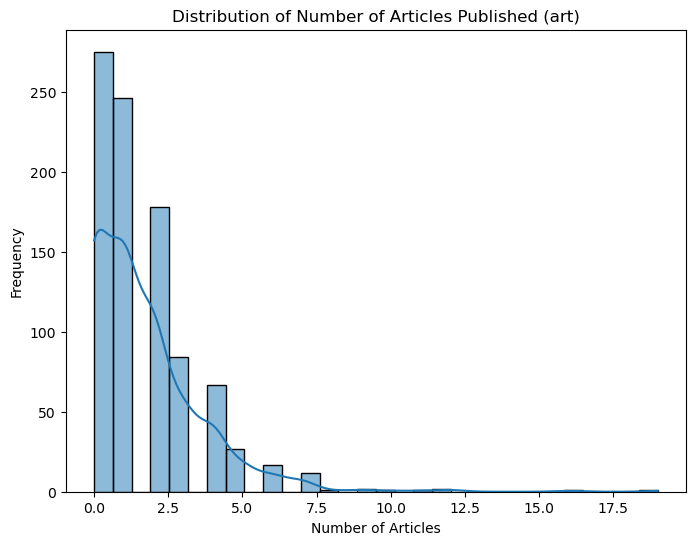

Skewness of 'art': 2.518920485912477
Kurtosis of 'art': 12.66293353346413
Shapiro-Wilk test: Test Statistic = 0.7717832326889038, p-value = 8.40267147361276e-34
Root Mean Squared Error (RMSE) on Test Set: 0.5676030946682017
Intercept: 0.6217288174889681
Coefficients:
  Variable  Coefficient
0      fem    -0.095214
1      mar     0.086266
2     kid5    -0.093117
3      phd     0.016170
4     ment     0.017921


In [111]:
# The distribution of the response variable 'art'
plt.figure(figsize=(8, 6))
sns.histplot(long_data['art'], bins=30, kde=True)
plt.title("Distribution of Number of Articles Published (art)")
plt.xlabel("Number of Articles")
plt.ylabel("Frequency")
plt.show()

# Check skewness and kurtosis of 'art'
print("Skewness of 'art':", skew(art))
print("Kurtosis of 'art':", kurtosis(art))

# Perform Shapiro-Wilk test for normality on 'art'
shapiro_test_stat, shapiro_p_value = shapiro(data['art'])
print(f"Shapiro-Wilk test: Test Statistic = {shapiro_test_stat}, p-value = {shapiro_p_value}")

# Apply log transformation to 'art'
data['log_art'] = np.log1p(data['art'])  # Using np.log1p to handle zeros gracefully

# Split data into training and testing sets
X = data[['fem', 'mar', 'kid5', 'phd', 'ment']]
y = data['log_art']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance (e.g., using RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")

# View coefficients of the linear regression model
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)


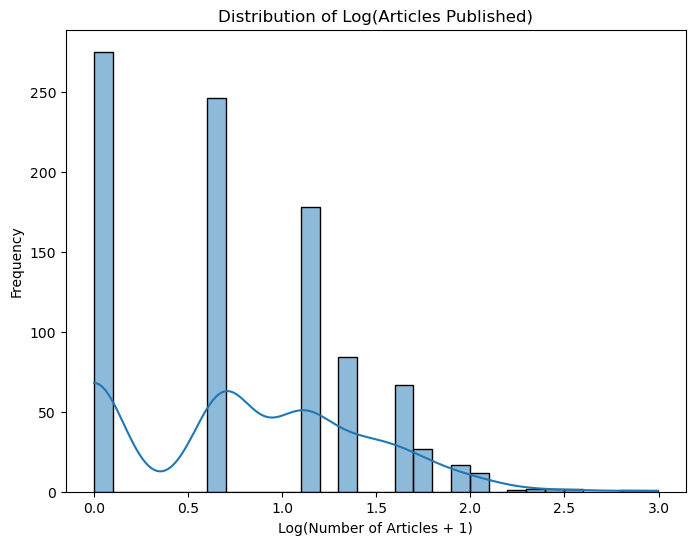

Skewness of log-transformed 'art': nan
Kurtosis of log-transformed 'art': nan
Shapiro-Wilk test: Test Statistic = 0.9009427428245544, p-value = 7.428115443091879e-24


C:\Users\acer\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [112]:
plt.figure(figsize=(8, 6))
sns.histplot(data['log_art'], bins=30, kde=True)
plt.title("Distribution of Log(Articles Published)")
plt.xlabel("Log(Number of Articles + 1)")
plt.ylabel("Frequency")
plt.show()

# Check skewness and kurtosis of log-transformed 'art'
print("Skewness of log-transformed 'art':", skew(art_log))
print("Kurtosis of log-transformed 'art':", kurtosis(art_log))

# Perform Shapiro-Wilk test for normality on 'log_art'
shapiro_test_stat, shapiro_p_value = shapiro(data['log_art'])
print(f"Shapiro-Wilk test: Test Statistic = {shapiro_test_stat}, p-value = {shapiro_p_value}")



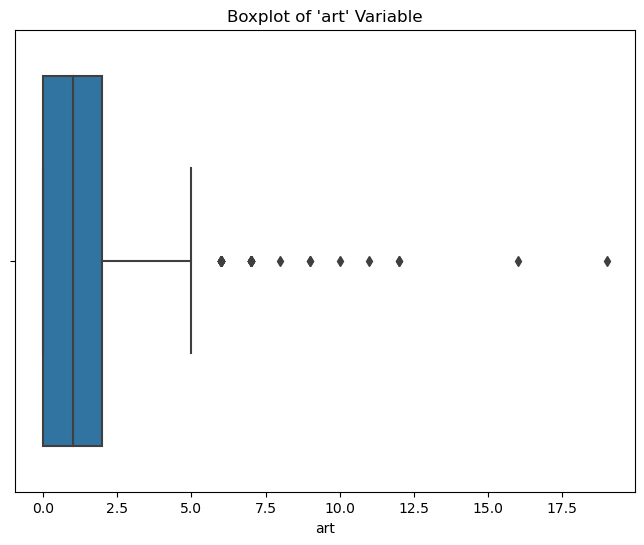

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a boxplot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['art'])
plt.title("Boxplot of 'art' Variable")
plt.show()


In [114]:
# Calculate summary statistics
mean_art = data['art'].mean()
std_art = data['art'].std()
q1 = data['art'].quantile(0.25)
q3 = data['art'].quantile(0.75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define outlier thresholds
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# Identify outliers
outliers = data[(data['art'] < lower_threshold) | (data['art'] > upper_threshold)]
print("Outliers:")
print(outliers)


Outliers:
     fem  ment   phd  mar  kid5  art   log_art
22     0    16  3.85    1     1    6  1.945910
30     0     1  3.59    1     0    7  2.079442
41     0    19  4.34    0     0    7  2.079442
61     0    27  3.59    1     1    7  2.079442
66     0     6  3.47    0     0    6  1.945910
81     0    21  1.74    1     0   16  2.833213
110    0     9  4.34    1     0    6  1.945910
127    0    13  2.96    1     1    6  1.945910
141    0    23  2.96    1     1    9  2.302585
143    0     8  4.62    1     1    6  1.945910
171    0     5  1.86    1     1   12  2.564949
181    0    47  1.86    1     1    9  2.302585
185    0     9  3.69    1     0    7  2.079442
193    0     6  2.54    0     0    7  2.079442
200    0    15  4.62    0     0    7  2.079442
203    0    42  4.54    0     0    7  2.079442
227    0     0  1.97    1     1    7  2.079442
247    0    18  4.29    0     0    6  1.945910
251    0    35  4.29    1     1   12  2.564949
258    0    19  4.29    0     0    7  2.079442
276

In [115]:
from scipy import stats

# Calculate z-scores
z_scores = stats.zscore(data['art'])

# Identify outliers based on z-score threshold (e.g., 3)
outliers = data[abs(z_scores) > 3]
print("Outliers:")
print(outliers)


Outliers:
     fem  ment   phd  mar  kid5  art   log_art
81     0    21  1.74    1     0   16  2.833213
141    0    23  2.96    1     1    9  2.302585
171    0     5  1.86    1     1   12  2.564949
181    0    47  1.86    1     1    9  2.302585
251    0    35  4.29    1     1   12  2.564949
414    0    11  2.51    1     0    8  2.197225
467    0    42  1.86    1     0   19  2.995732
472    0     7  2.86    1     2   11  2.484907
548    1    18  3.59    1     0   10  2.397895


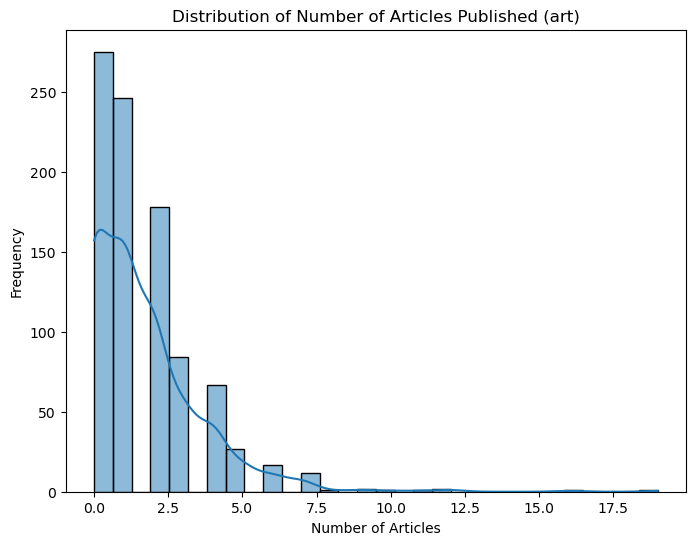

Shapiro-Wilk Test: Statistics=0.7718, p-value=0.0000


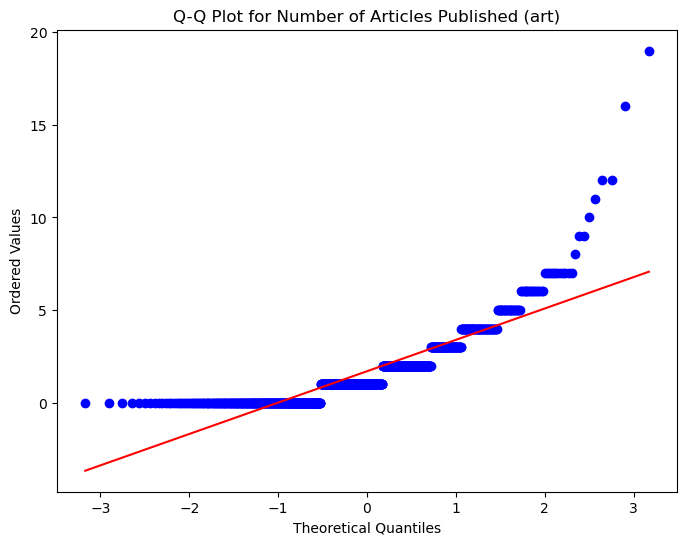

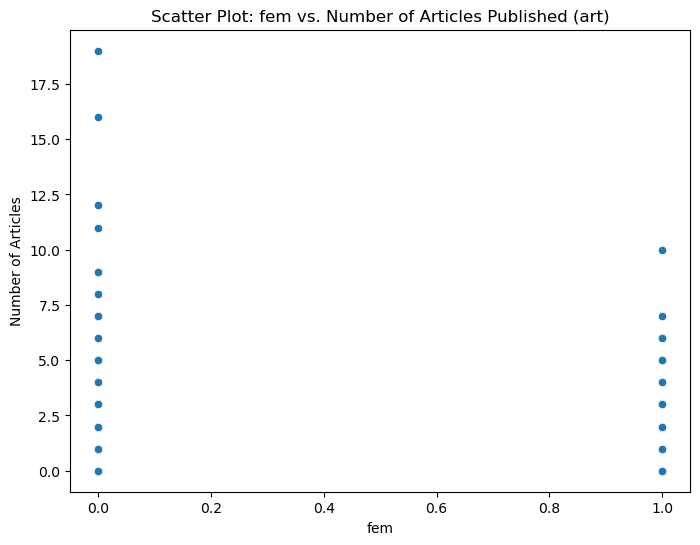

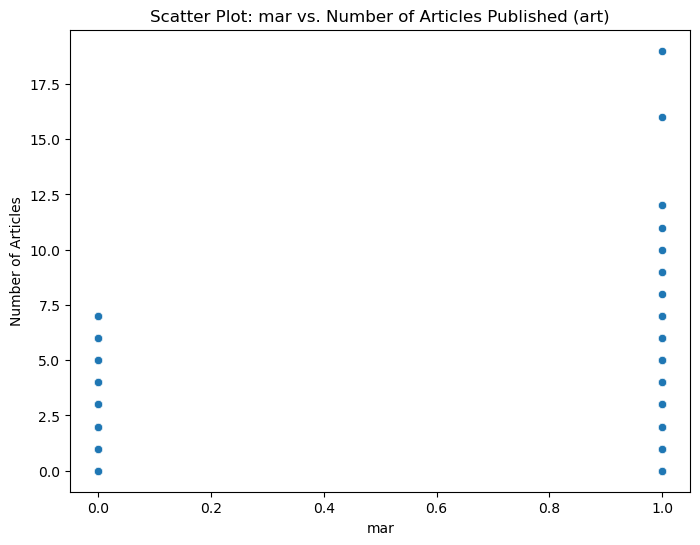

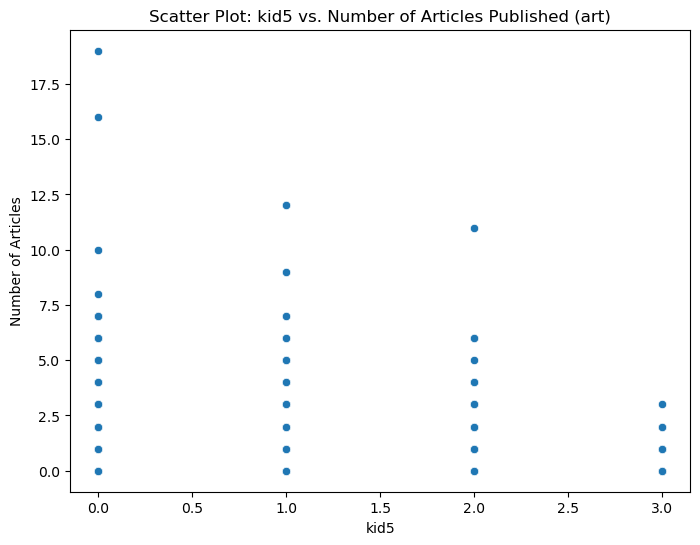

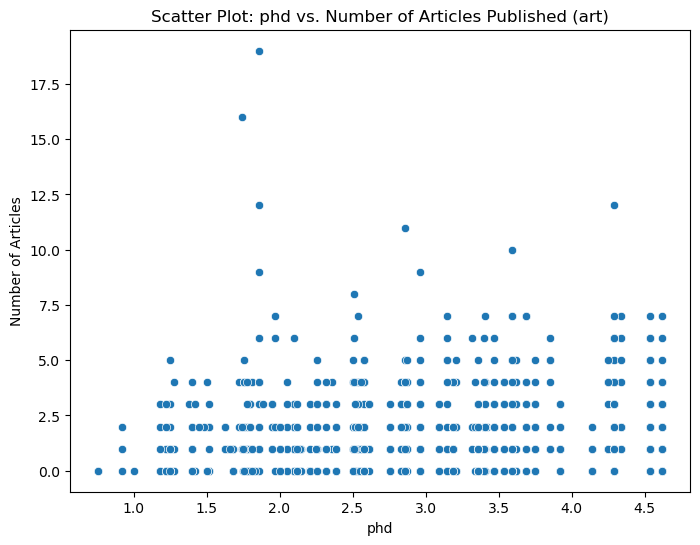

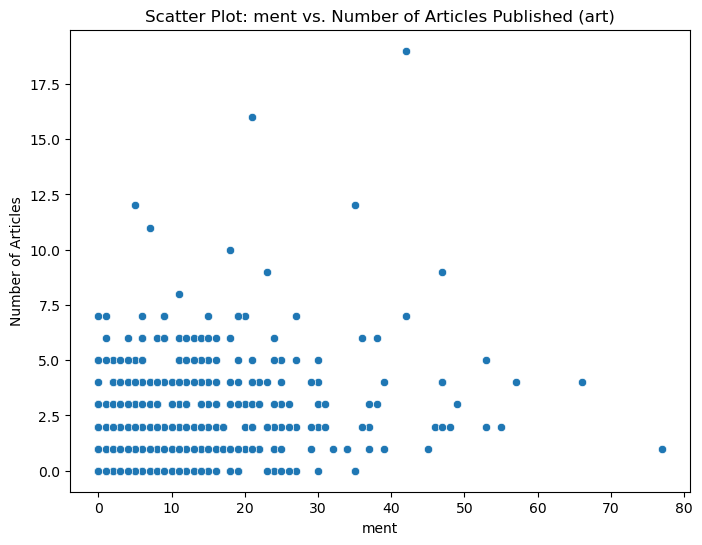

In [116]:
# Extract the response variable 'art'
art = data['art']

# Visualize the distribution of 'art'
plt.figure(figsize=(8, 6))
sns.histplot(art, bins=30, kde=True)
plt.title("Distribution of Number of Articles Published (art)")
plt.xlabel("Number of Articles")
plt.ylabel("Frequency")
plt.show()

# Check normality using Shapiro-Wilk test
stat, p = stats.shapiro(art)
print(f"Shapiro-Wilk Test: Statistics={stat:.4f}, p-value={p:.4f}")

# Plot Q-Q plot for normality assessment
plt.figure(figsize=(8, 6))
stats.probplot(art, dist="norm", plot=plt)
plt.title("Q-Q Plot for Number of Articles Published (art)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

# Assess linearity with scatter plots against explanatory variables
explanatory_vars = ['fem', 'mar', 'kid5', 'phd', 'ment']
for var in explanatory_vars:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[var], y=art)
    plt.title(f"Scatter Plot: {var} vs. Number of Articles Published (art)")
    plt.xlabel(var)
    plt.ylabel("Number of Articles")
    plt.show()


## (part b)

In [121]:
import statsmodels.api as sm

model = sm.GLM(data['art'], sm.add_constant(data[['fem', 'mar', 'kid5', 'phd', 'ment']]), family=sm.families.Poisson())
results = model.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      909
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1651.1
Date:                Fri, 03 May 2024   Deviance:                       1634.4
Time:                        19:40:02   Pearson chi2:                 1.66e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1813
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3046      0.103      2.958      0.0

## CONCLUSION
### fem: 
#### Coefficient (coef): -0.2246
#### Statistical Significance (p-value): p < 0.001
#### Being female is associated with a decrease in the expected log count of articles (art).
#### Female doctoral students tend to publish fewer articles compared to male students, all else being equal.
### mar: 
#### Coefficient (coef): 0.1552
#### Statistical Significance (p-value): p = 0.011
#### Being married is associated with an increase in the expected log count of articles (art).
####  Married doctoral students tend to publish more articles compared to unmarried students, controlling for other factors.
### kid5: 
#### Coefficient (coef): -0.1849
#### Statistical Significance (p-value):  p < 0.001
#### Having young children (age five or younger) is associated with a decrease in the expected log count of articles (art).
####  Doctoral students with young children tend to have lower research productivity, likely due to caregiving responsibilities.
### phd: 
#### Coefficient (coef): 0.0128
#### Statistical Significance (p-value):   p = 0.627
#### The PhD department has a minimal impact on the expected log count of articles (art).
#### the PhD department does not significantly influence research productivity among biochemistry doctoral students in this analysis.
### ment: 
#### Coefficient (coef): 0.0255
#### Statistical Significance (p-value):   p < 0.001
#### The number of articles published by the mentor positively influences the expected log count of articles (art).
#### Having a mentor with a strong publication record is associated with higher research productivity among doctoral students.

#### Model Fit: The model explains around 18.13% of the variation in research productivity (pseudo R-squared = 0.1813).
#### The overall model is statistically significant (p < 0.001), indicating that the combination of predictors (gender, marital status, number of young children, mentor's publication record) significantly explains the variation in research productivity (art) within the biochemistry doctoral student population.